In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [7]:
# Load the datasets
train_df = pd.read_csv('../datasets/datatraining.txt')
test_df = pd.read_csv('../datasets/datatest.txt')
test2_df = pd.read_csv('../datasets/datatest2.txt')

In [9]:
# Convert date column to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
test2_df['date'] = pd.to_datetime(test2_df['date'])

In [11]:
# Create figure for time series plots
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

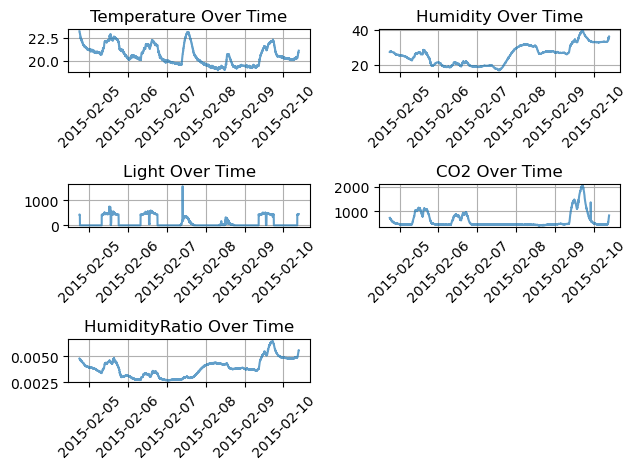

In [13]:
# Plot 1: Time series of all sensors
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    plt.plot(train_df['date'], train_df[feature], alpha=0.7)
    plt.title(f'{feature} Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
plt.tight_layout()
plt.show()

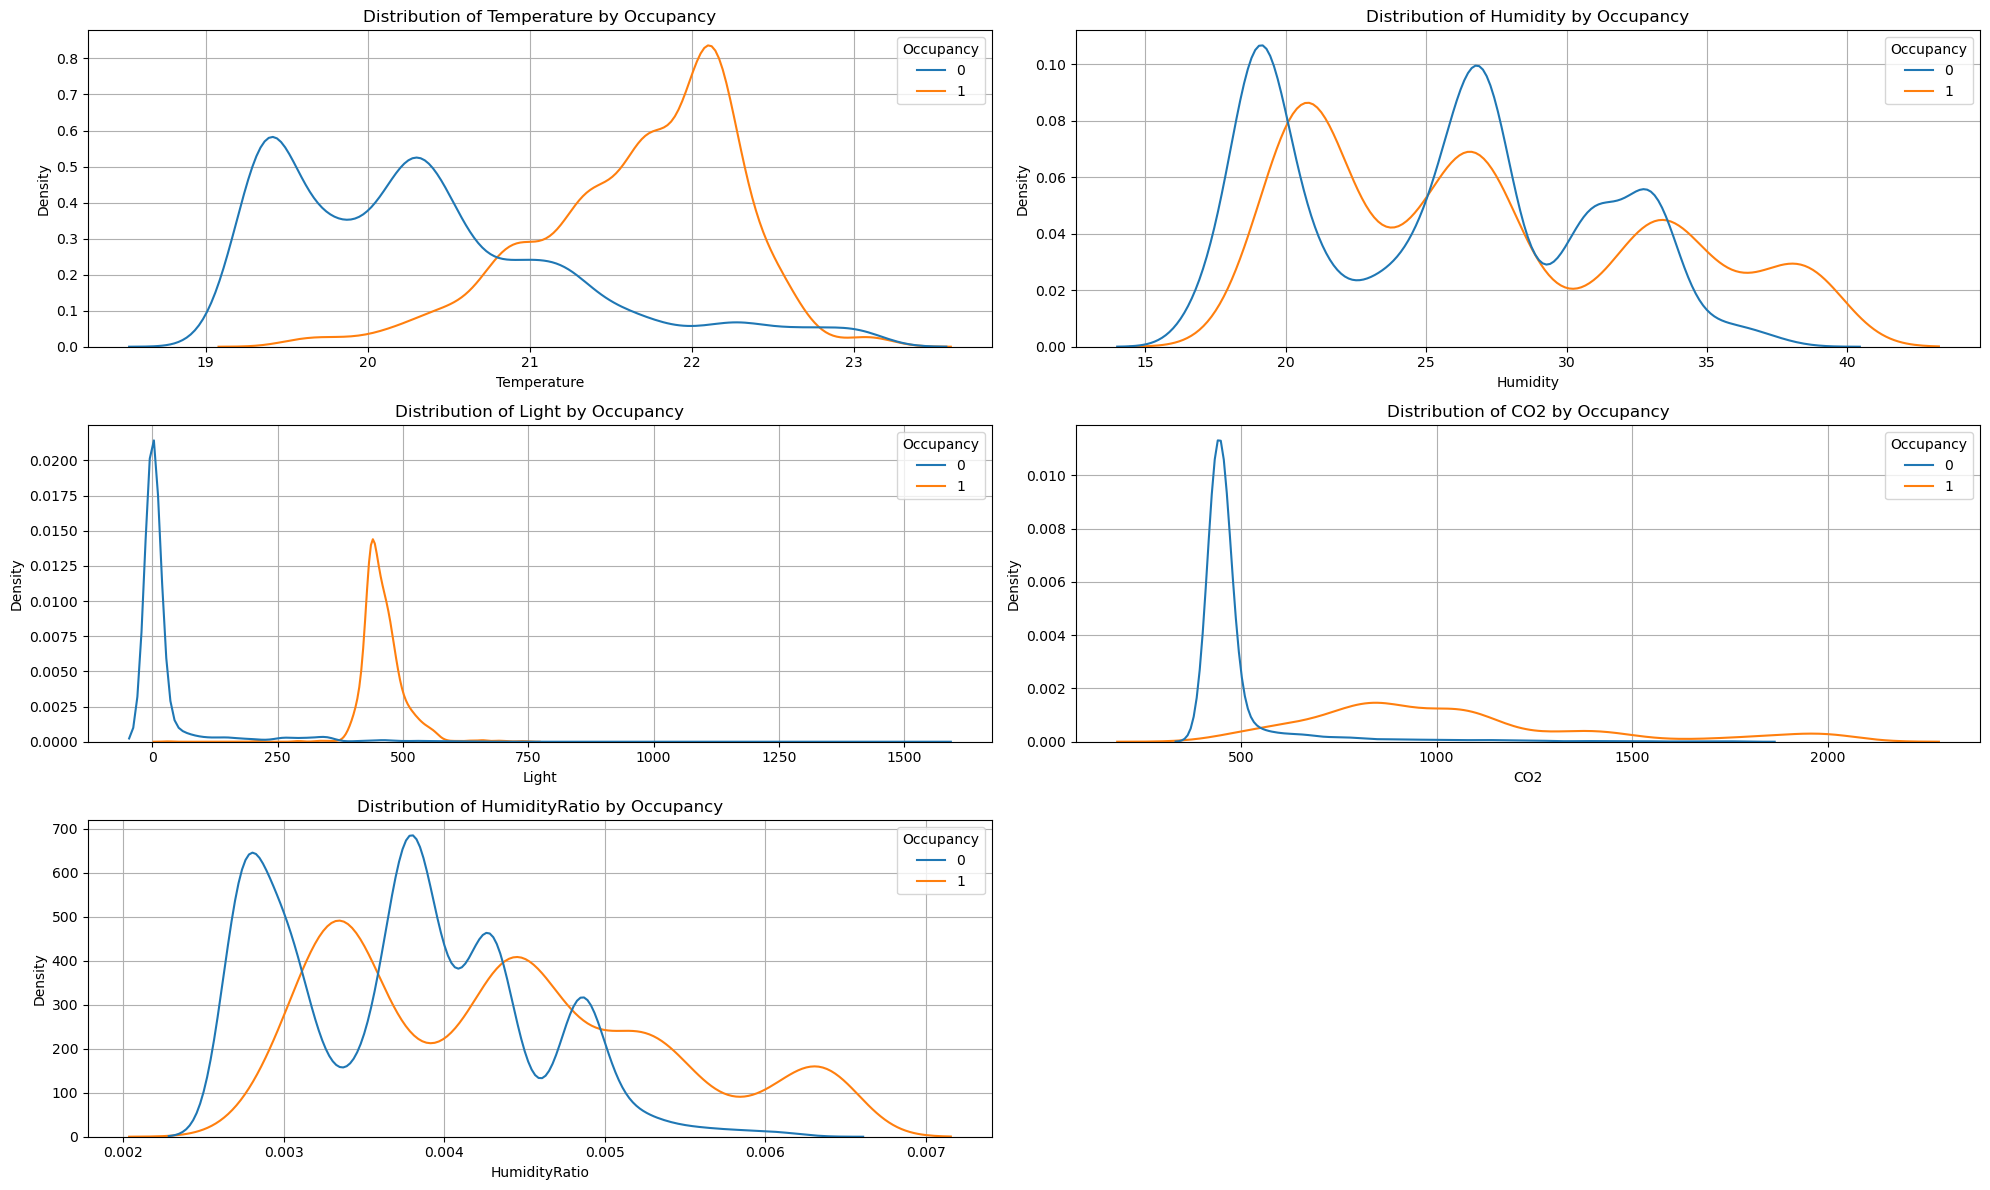

In [15]:
# Plot 2: Distribution plots for each feature by occupancy
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data=train_df, x=feature, hue='Occupancy', common_norm=False)
    plt.title(f'Distribution of {feature} by Occupancy')
    plt.grid(True)
plt.tight_layout()
plt.show()

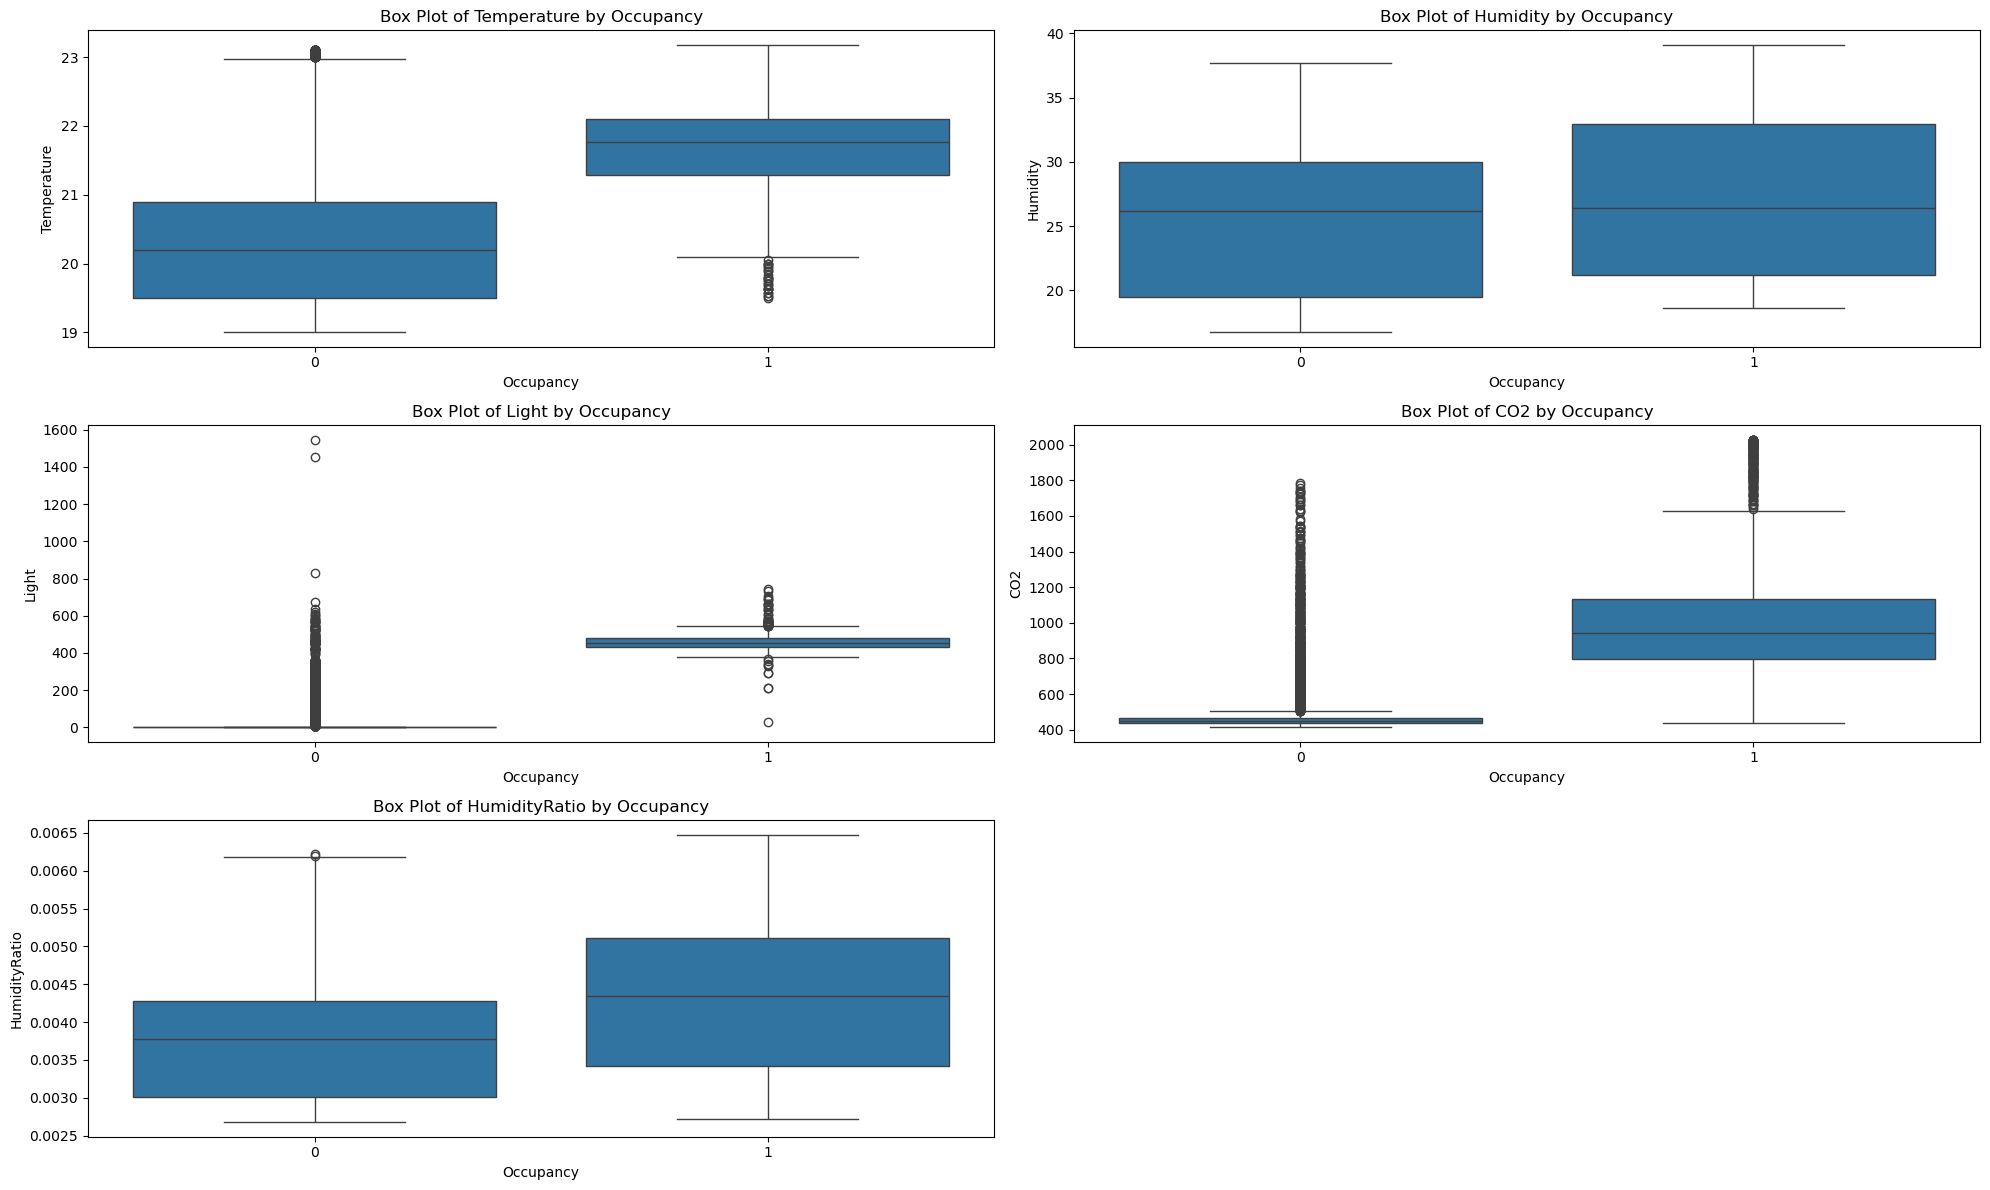

In [17]:
# Plot 3: Box plots for each feature by occupancy
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=train_df, x='Occupancy', y=feature)
    plt.title(f'Box Plot of {feature} by Occupancy')
plt.tight_layout()
plt.show()

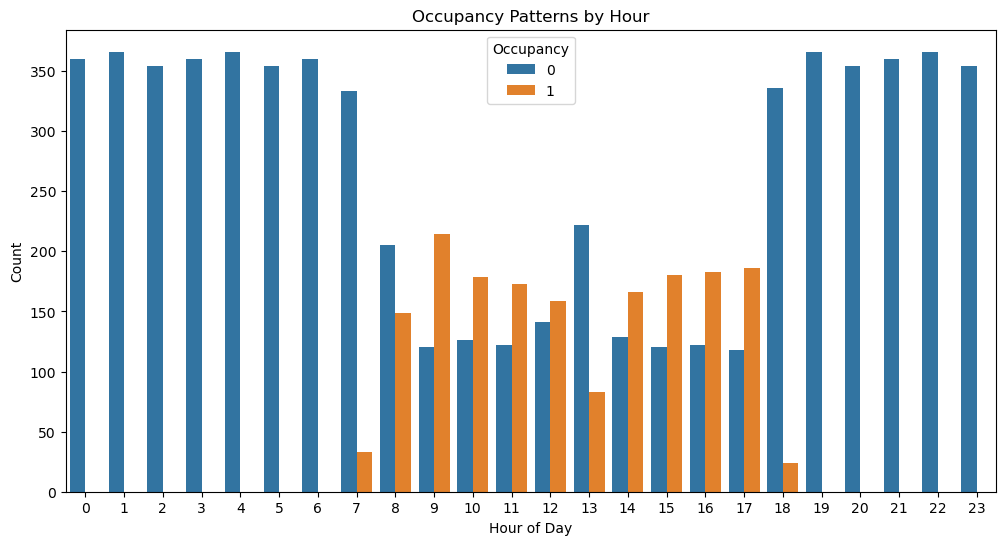

In [19]:
# Plot 4: Occupancy patterns by hour
train_df['hour'] = train_df['date'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='hour', hue='Occupancy')
plt.title('Occupancy Patterns by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

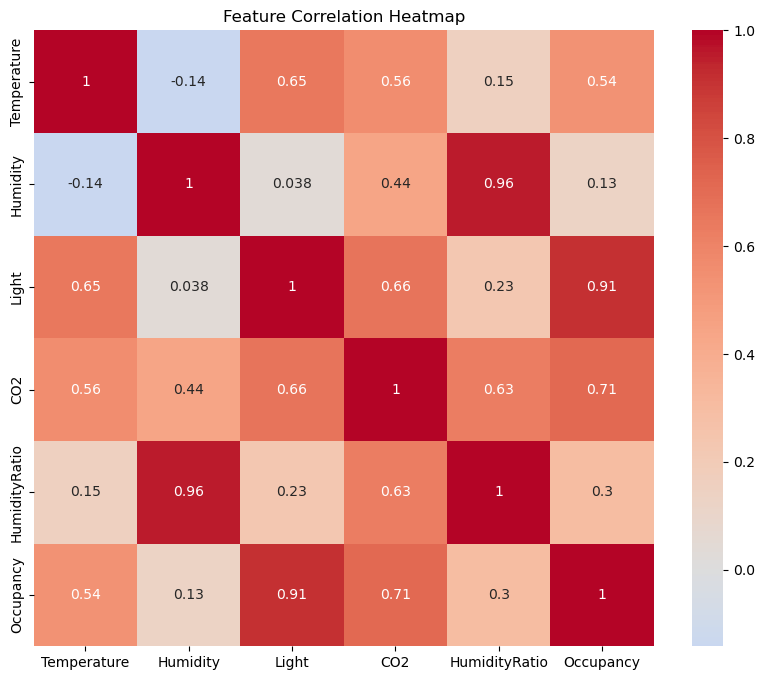

In [21]:
# Plot 5: Correlation Heatmap with annotations
plt.figure(figsize=(10, 8))
correlation = train_df[features + ['Occupancy']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [23]:
# Data preprocessing and statistics
print("\nBasic Statistics for each feature when room is occupied vs unoccupied:")
print("\nOccupied:")
print(train_df[train_df['Occupancy'] == 1][features].describe())
print("\nUnoccupied:")
print(train_df[train_df['Occupancy'] == 0][features].describe())


Basic Statistics for each feature when room is occupied vs unoccupied:

Occupied:
       Temperature     Humidity        Light          CO2  HumidityRatio
count  1729.000000  1729.000000  1729.000000  1729.000000    1729.000000
mean     21.673192    27.147938   459.854347  1037.704786       0.004355
std       0.622891     6.128497    42.286862   377.603278       0.001006
min      19.500000    18.600000    31.000000   439.000000       0.002715
25%      21.290000    21.236000   433.000000   796.000000       0.003419
50%      21.767500    26.442500   454.000000   944.000000       0.004347
75%      22.100000    32.975000   477.750000  1131.250000       0.005107
max      23.180000    39.117500   744.000000  2028.500000       0.006476

Unoccupied:
       Temperature     Humidity        Light          CO2  HumidityRatio
count  6414.000000  6414.000000  6414.000000  6414.000000    6414.000000
mean     20.334931    25.349685    27.776442   490.320312       0.003730
std       0.909973     5.294

In [25]:
# Calculate feature importance using standard deviation ratio
std_ratio = {}
for feature in features:
    occupied_std = train_df[train_df['Occupancy'] == 1][feature].std()
    unoccupied_std = train_df[train_df['Occupancy'] == 0][feature].std()
    std_ratio[feature] = abs(occupied_std - unoccupied_std) / min(occupied_std, unoccupied_std)

print("\nFeature Variability Ratio (Higher ratio suggests better discriminative power):")
for feature, ratio in sorted(std_ratio.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {ratio:.2f}")


Feature Variability Ratio (Higher ratio suggests better discriminative power):
CO2: 1.47
Light: 1.12
Temperature: 0.46
HumidityRatio: 0.34
Humidity: 0.16


In [27]:
# Class balance
print("\nClass Balance:")
print(train_df['Occupancy'].value_counts(normalize=True) * 100)


Class Balance:
Occupancy
0    78.767039
1    21.232961
Name: proportion, dtype: float64
